# Entrenamiento del modelo

In [1]:
# Importamos las librerías que vamos a necesitar
# Librerías generales
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tensorflow y sklearn
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## Funciones

In [2]:
# Convertimos un arreglo de valores en una matriz
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

## Preparación de datos

In [3]:
# Ajustamos una semilla para poder reproducir el modelo siempre igual
tf.random.set_seed(7)

In [4]:
# Cargamos el dataset
dataframe = pd.read_excel('./datasets/E162525-time-series-mantto.xlsx', usecols=[1])
dataset = dataframe.values
dataset = dataset.astype('float32')

### Como el dataset está en serie obtenemos la columna de los días de mantenimiento

In [5]:
dataset

array([[120.],
       [119.],
       [118.],
       ...,
       [  2.],
       [  1.],
       [120.]], dtype=float32)

In [6]:
# normalizamos el dataset para que ajuste los valores entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

### Vemos el dataset normalizado

In [7]:
dataset

array([[1.       ],
       [0.9921875],
       [0.984375 ],
       ...,
       [0.078125 ],
       [0.0703125],
       [1.       ]], dtype=float32)

In [8]:
# Separamos entre el set de entrenamiento y el de test
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

### Checamos el tamaño de los nuevos sets

In [9]:
print("Tamaño del set de entrenamiento", train.shape)
print("Tamaño del set de entrenamiento", test.shape)

Tamaño del set de entrenamiento (1369, 1)
Tamaño del set de entrenamiento (675, 1)


In [10]:
# Cambiamos la forma de nuestrs sets X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

### Vemos que los sets cambiaron de tamaño, esto para darle el formato que necesitaremos para el modelo

In [11]:
print("Tamaño del set trainX", trainX.shape)
print("Tamaño del set trainY", trainY.shape)
print("Tamaño del set testX", testX.shape)
print("Tamaño del set testY", testY.shape)

Tamaño del set trainX (1367, 1)
Tamaño del set trainY (1367,)
Tamaño del set testX (673, 1)
Tamaño del set testY (673,)


In [12]:
# Cambiamos la forma del dataset a [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

### El modelo LSTM necesita que los valores ingresados esté en tres dimensiones así que se cambiamos la forma del dataset de nuevo

In [13]:
print("Tamaño del set trainX", trainX.shape)
print("Tamaño del set testX", testX.shape)

Tamaño del set trainX (1367, 1, 1)
Tamaño del set testX (673, 1, 1)


In [14]:
trainX

array([[[1.       ]],

       [[0.9921875]],

       [[0.984375 ]],

       ...,

       [[0.6328125]],

       [[0.625    ]],

       [[0.6171875]]], dtype=float32)

## Creación del modelo

In [15]:
# Creamos y probamos el modelo LSTM
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1367/1367 - 3s - loss: 0.0586 - 3s/epoch - 2ms/step
Epoch 2/100
1367/1367 - 2s - loss: 0.0071 - 2s/epoch - 1ms/step
Epoch 3/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 4/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 5/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 6/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 7/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 8/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 9/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 10/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 11/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 12/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 13/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 14/100
1367/1367 - 2s - loss: 0.0052 - 2s/epoch - 1ms/step
Epoch 15/100
1367/1367 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 16/100
1367/1367 - 2s - loss

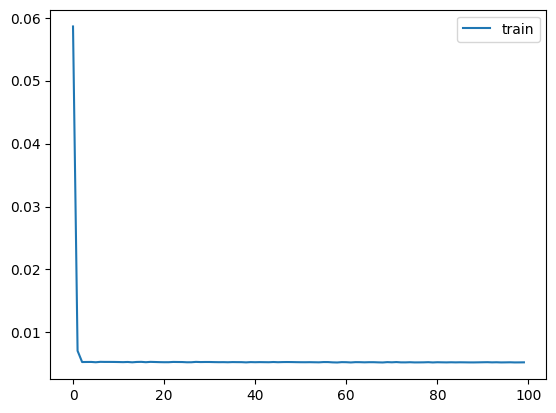

In [16]:
# graficamos la perdida
plt.plot(history.history["loss"], label="train")
plt.legend()
plt.show()

## Predicciones

In [17]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

22/22 [==============================] - 0s 1ms/step


In [18]:
testPredict

array([[0.5944695 ],
       [0.5864712 ],
       [0.5784802 ],
       [0.570498  ],
       [0.5625258 ],
       [0.5545652 ],
       [0.5466177 ],
       [0.53868484],
       [0.5307681 ],
       [0.52286893],
       [0.51498896],
       [0.5071297 ],
       [0.49929276],
       [0.49147952],
       [0.48369166],
       [0.47593072],
       [0.46819827],
       [0.46049592],
       [0.4528252 ],
       [0.44518772],
       [0.4375851 ],
       [0.4300188 ],
       [0.4224904 ],
       [0.4150016 ],
       [0.40755373],
       [0.40014848],
       [0.3927874 ],
       [0.385472  ],
       [0.37820375],
       [0.37098423],
       [0.36381474],
       [0.35669696],
       [0.3496322 ],
       [0.342622  ],
       [0.3356677 ],
       [0.32877064],
       [0.3219323 ],
       [0.31515396],
       [0.3084369 ],
       [0.30178243],
       [0.29519185],
       [0.28866634],
       [0.2822071 ],
       [0.27581534],
       [0.26949212],
       [0.26323858],
       [0.2570558 ],
       [0.250

### Devolvemos los datos a sus valores originales (de entre 0 y 1 a su número original)

In [19]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [20]:
testPredict

array([[ 68.092094],
       [ 67.06831 ],
       [ 66.04546 ],
       [ 65.02374 ],
       [ 64.0033  ],
       [ 62.984344],
       [ 61.967064],
       [ 60.95166 ],
       [ 59.938316],
       [ 58.927223],
       [ 57.918587],
       [ 56.912605],
       [ 55.909473],
       [ 54.909378],
       [ 53.912533],
       [ 52.919132],
       [ 51.92938 ],
       [ 50.943478],
       [ 49.961624],
       [ 48.984028],
       [ 48.01089 ],
       [ 47.042408],
       [ 46.07877 ],
       [ 45.120205],
       [ 44.166878],
       [ 43.219006],
       [ 42.276787],
       [ 41.340416],
       [ 40.41008 ],
       [ 39.48598 ],
       [ 38.568287],
       [ 37.65721 ],
       [ 36.752922],
       [ 35.855618],
       [ 34.965466],
       [ 34.08264 ],
       [ 33.207333],
       [ 32.339706],
       [ 31.479923],
       [ 30.62815 ],
       [ 29.784557],
       [ 28.949291],
       [ 28.122509],
       [ 27.304363],
       [ 26.494991],
       [ 25.694538],
       [ 24.903141],
       [ 24.1

### Medimos la varianza de nuestras predicciones con el RMSE

In [21]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 9.21 RMSE
Test Score: 9.36 RMSE


# Asignamos los valores de nuestra predicción a nuestro dataset para graficar

In [22]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [23]:
trainPredictPlot

array([[      nan],
       [118.95688],
       [118.07069],
       ...,
       [      nan],
       [      nan],
       [      nan]], dtype=float32)

In [24]:
testPredictPlot

array([[      nan],
       [      nan],
       [      nan],
       ...,
       [11.732353],
       [11.143007],
       [      nan]], dtype=float32)

## Gráficas

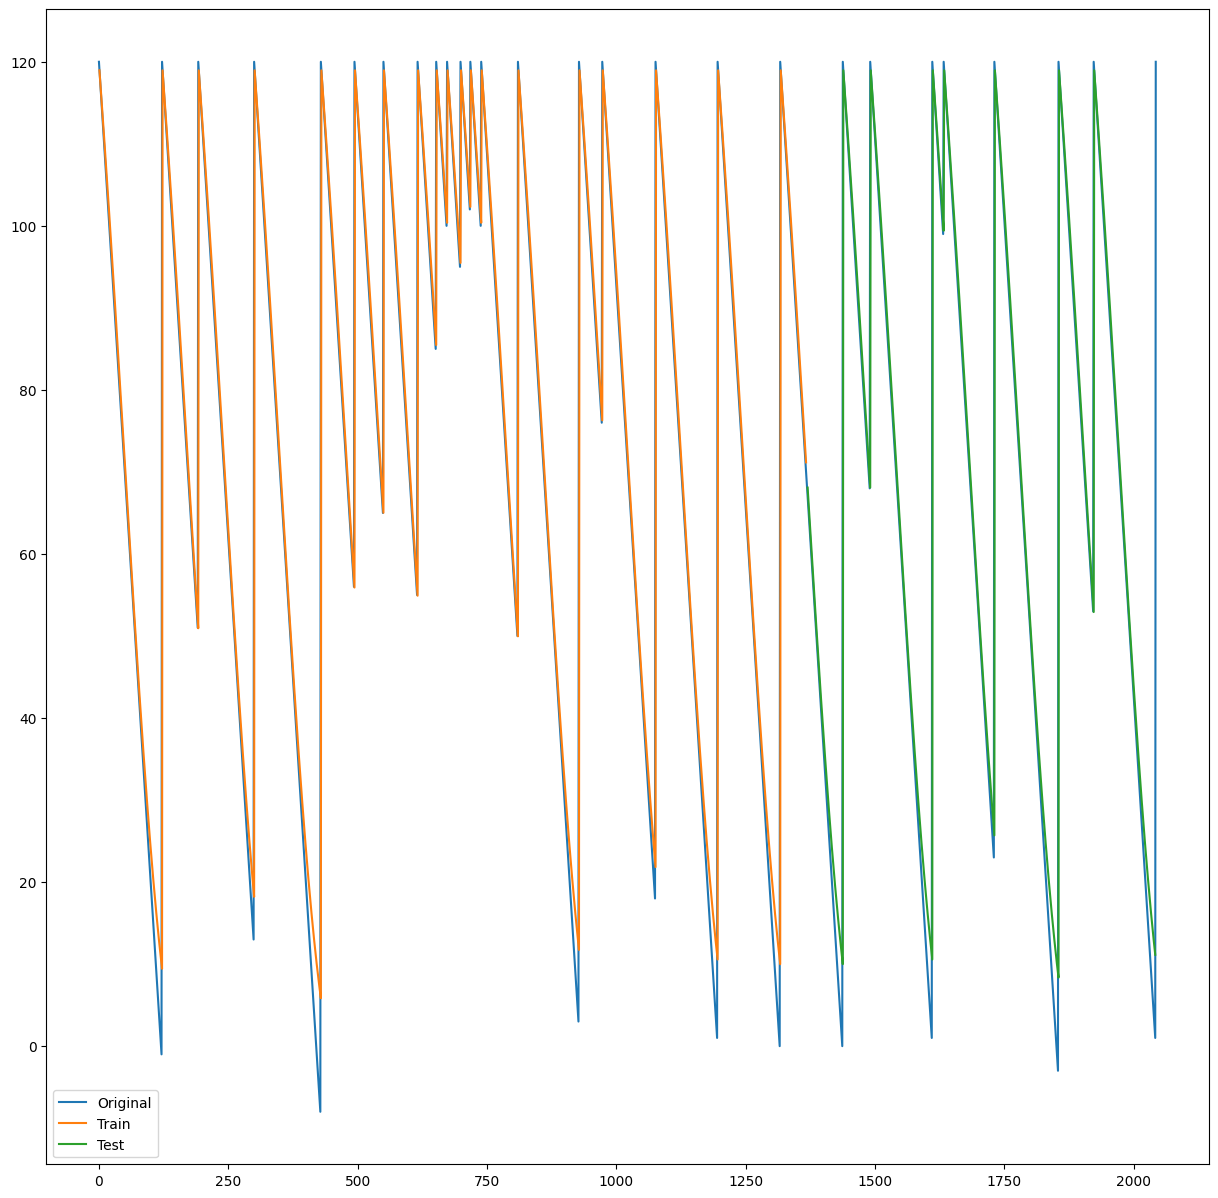

In [25]:
# plot baseline and predictions
plt.figure(figsize=(15,15))
plt.plot(scaler.inverse_transform(dataset), label="Original")
plt.plot(trainPredictPlot, label="Train")
plt.plot(testPredictPlot, label="Test")
plt.legend(loc="best")
plt.show()

## Pruebas con otro modelo

In [26]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    from pandas import DataFrame
    from pandas import concat
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [27]:
def agregarNuevoValor(x_test, nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test

In [28]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
    from numpy import array
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [30]:
dataset_inicial = scaler.inverse_transform(dataset).astype("int32")
dataset_inicial

array([[120],
       [119],
       [118],
       ...,
       [  2],
       [  1],
       [120]])

In [31]:
df_supervised = series_to_supervised(dataset_inicial, 15, 1)
df_supervised

,var1(t-15),var1(t-14),var1(t-13),var1(t-12),var1(t-11),var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
15,120.0,119.0,118.0,117.0,116.0,115.0,114.0,113.0,112.0,111.0,110.0,109.0,108.0,107.0,106.0,105
16,119.0,118.0,117.0,116.0,115.0,114.0,113.0,112.0,111.0,110.0,109.0,108.0,107.0,106.0,105.0,104
17,118.0,117.0,116.0,115.0,114.0,113.0,112.0,111.0,110.0,109.0,108.0,107.0,106.0,105.0,104.0,103
18,117.0,116.0,115.0,114.0,113.0,112.0,111.0,110.0,109.0,108.0,107.0,106.0,105.0,104.0,103.0,102
19,116.0,115.0,114.0,113.0,112.0,111.0,110.0,109.0,108.0,107.0,106.0,105.0,104.0,103.0,102.0,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,19.0,18.0,17.0,16.0,15.0,14.0,13.0,12.0,11.0,10.0,9.0,8.0,7.0,6.0,5.0,4
2040,18.0,17.0,16.0,15.0,14.0,13.0,12.0,11.0,10.0,9.0,8.0,7.0,6.0,5.0,4.0,3
2041,17.0,16.0,15.0,14.0,13.0,12.0,11.0,10.0,9.0,8.0,7.0,6.0,5.0,4.0,3.0,2
2042,16.0,15.0,14.0,13.0,12.0,11.0,10.0,9.0,8.0,7.0,6.0,5.0,4.0,3.0,2.0,1


In [33]:
supervised_values = df_supervised.values.astype("float32")
supervised_values

array([[120., 119., 118., ..., 107., 106., 105.],
       [119., 118., 117., ..., 106., 105., 104.],
       [118., 117., 116., ..., 105., 104., 103.],
       ...,
       [ 17.,  16.,  15., ...,   4.,   3.,   2.],
       [ 16.,  15.,  14., ...,   3.,   2.,   1.],
       [ 15.,  14.,  13., ...,   2.,   1., 120.]], dtype=float32)

In [34]:
scaler2 = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler2.fit_transform(supervised_values)
scaled_values

array([[1.       , 0.9921875, 0.984375 , ..., 0.8984375, 0.890625 ,
        0.8828125],
       [0.9921875, 0.984375 , 0.9765625, ..., 0.890625 , 0.8828125,
        0.875    ],
       [0.984375 , 0.9765625, 0.96875  , ..., 0.8828125, 0.875    ,
        0.8671875],
       ...,
       [0.1953125, 0.1875   , 0.1796875, ..., 0.09375  , 0.0859375,
        0.078125 ],
       [0.1875   , 0.1796875, 0.171875 , ..., 0.0859375, 0.078125 ,
        0.0703125],
       [0.1796875, 0.171875 , 0.1640625, ..., 0.078125 , 0.0703125,
        1.       ]], dtype=float32)

In [36]:
scaled_values.shape

(2029, 16)

In [38]:
dias = 1400
train2 = scaled_values[:dias,:]
test2 = scaled_values[dias:,:]

In [39]:
train2.shape

(1369, 1)

In [40]:
test2.shape

(629, 16)

In [41]:
Xtrain, ytrain = train2[:,:-1], train2[:,-1]
Xtest, ytest = test2[:,:-1], test2[:,-1]

In [42]:
# convertimos los datos en formato de 3 dimensiones para el modelo LSTM
train_X_3D = Xtrain.reshape((Xtrain.shape[0], 1, Xtrain.shape[1]))
test_X_3D = Xtest.reshape((Xtest.shape[0], 1, Xtest.shape[1]))

# Las y quedan igual pues es a donde queremos llegar
print(train_X_3D.shape, ytrain.shape, test_X_3D.shape, ytest.shape)

(1400, 1, 15) (1400,) (629, 1, 15) (629,)


In [50]:
# Diseñamos el modelo
model2 = Sequential()
# model2.add(LSTM(4, input_shape=(train_X_3D.shape[0], train_X_3D.shape[2])))
model2.add(LSTM(4))
model2.add(Dense(1))
model2.compile(loss="mean_squared_error", optimizer="adam")

In [51]:
history = model2.fit(train_X_3D, ytrain, 
                    epochs=100, batch_size=1, 
                    verbose=2)

Epoch 1/100
1400/1400 - 3s - loss: 0.0535 - 3s/epoch - 2ms/step
Epoch 2/100
1400/1400 - 2s - loss: 0.0076 - 2s/epoch - 1ms/step
Epoch 3/100
1400/1400 - 2s - loss: 0.0063 - 2s/epoch - 1ms/step
Epoch 4/100
1400/1400 - 2s - loss: 0.0058 - 2s/epoch - 1ms/step
Epoch 5/100
1400/1400 - 2s - loss: 0.0056 - 2s/epoch - 1ms/step
Epoch 6/100
1400/1400 - 2s - loss: 0.0054 - 2s/epoch - 1ms/step
Epoch 7/100
1400/1400 - 2s - loss: 0.0055 - 2s/epoch - 1ms/step
Epoch 8/100
1400/1400 - 2s - loss: 0.0054 - 2s/epoch - 1ms/step
Epoch 9/100
1400/1400 - 2s - loss: 0.0054 - 2s/epoch - 1ms/step
Epoch 10/100
1400/1400 - 2s - loss: 0.0054 - 2s/epoch - 1ms/step
Epoch 11/100
1400/1400 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 12/100
1400/1400 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 13/100
1400/1400 - 2s - loss: 0.0054 - 2s/epoch - 1ms/step
Epoch 14/100
1400/1400 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 15/100
1400/1400 - 2s - loss: 0.0053 - 2s/epoch - 1ms/step
Epoch 16/100
1400/1400 - 2s - loss

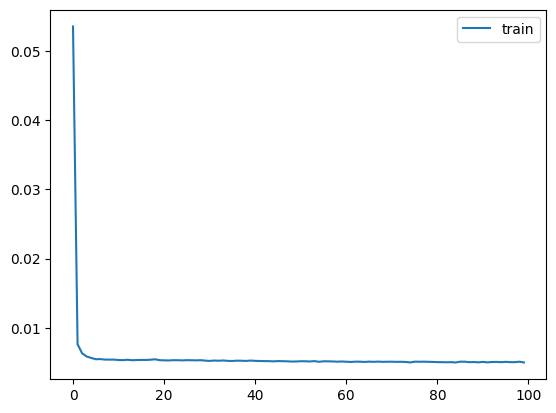

In [52]:
# graficamos la perdida
plt.plot(history.history["loss"], label="train")
# plt.plot(history.history["val_loss"], label="test")
plt.legend()
plt.show()

In [53]:
# make predictions
trainPredict = model2.predict(train_X_3D)
testPredict = model2.predict(test_X_3D)

20/20 [==============================] - 0s 1ms/step


In [85]:
lista_trainPredict = []
for i in trainPredict[:,0]:
    lista_trainPredict.append(i)

In [86]:
lista_ytrain = []
for j in ytrain:
    lista_ytrain.append(j)

In [90]:
ytest

array([0.234375 , 0.2265625, 0.21875  , 0.2109375, 0.203125 , 0.1953125,
       0.1875   , 0.1796875, 0.171875 , 0.1640625, 0.15625  , 0.1484375,
       0.140625 , 0.1328125, 0.125    , 0.1171875, 0.109375 , 0.1015625,
       0.09375  , 0.0859375, 0.078125 , 0.0703125, 0.0625   , 1.       ,
       0.9921875, 0.984375 , 0.9765625, 0.96875  , 0.9609375, 0.953125 ,
       0.9453125, 0.9375   , 0.9296875, 0.921875 , 0.9140625, 0.90625  ,
       0.8984375, 0.890625 , 0.8828125, 0.875    , 0.8671875, 0.859375 ,
       0.8515625, 0.84375  , 0.8359375, 0.828125 , 0.8203125, 0.8125   ,
       0.8046875, 0.796875 , 0.7890625, 0.78125  , 0.7734375, 0.765625 ,
       0.7578125, 0.75     , 0.7421875, 0.734375 , 0.7265625, 0.71875  ,
       0.7109375, 0.703125 , 0.6953125, 0.6875   , 0.6796875, 0.671875 ,
       0.6640625, 0.65625  , 0.6484375, 0.640625 , 0.6328125, 0.625    ,
       0.6171875, 0.609375 , 0.6015625, 0.59375  , 1.       , 0.9921875,
       0.984375 , 0.9765625, 0.96875  , 0.9609375, 

In [93]:
# calculate root mean squared error
trainScore2 = np.sqrt(mean_squared_error(
    [i for i in ytrain], 
    [i for i in trainPredict]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore2 = np.sqrt(mean_squared_error(
    [i for i in ytest], 
    [i for i in testPredict[:,0]]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.07 RMSE
Test Score: 0.08 RMSE


In [104]:
dias = 60
sl = dataset_inicial.shape[0]-dias

In [107]:
ult_60_dias = dataset_inicial[sl::].astype("float32")
ult_60_dias

array([[ 59.],
       [ 58.],
       [ 57.],
       [ 56.],
       [ 55.],
       [ 54.],
       [ 53.],
       [ 52.],
       [ 51.],
       [ 50.],
       [ 49.],
       [ 48.],
       [ 47.],
       [ 46.],
       [ 45.],
       [ 44.],
       [ 43.],
       [ 42.],
       [ 41.],
       [ 40.],
       [ 39.],
       [ 38.],
       [ 37.],
       [ 36.],
       [ 35.],
       [ 34.],
       [ 33.],
       [ 32.],
       [ 31.],
       [ 30.],
       [ 29.],
       [ 28.],
       [ 27.],
       [ 26.],
       [ 25.],
       [ 24.],
       [ 23.],
       [ 22.],
       [ 21.],
       [ 20.],
       [ 19.],
       [ 18.],
       [ 17.],
       [ 16.],
       [ 15.],
       [ 14.],
       [ 13.],
       [ 12.],
       [ 11.],
       [ 10.],
       [  9.],
       [  8.],
       [  7.],
       [  6.],
       [  5.],
       [  4.],
       [  3.],
       [  2.],
       [  1.],
       [120.]], dtype=float32)

In [108]:
scaled_values_2 = scaler2.fit_transform(ult_60_dias)
scaled_values_2

array([[0.487395  ],
       [0.47899163],
       [0.47058827],
       [0.4621849 ],
       [0.45378155],
       [0.44537818],
       [0.43697482],
       [0.42857146],
       [0.4201681 ],
       [0.41176474],
       [0.40336138],
       [0.39495802],
       [0.38655463],
       [0.37815127],
       [0.3697479 ],
       [0.36134455],
       [0.3529412 ],
       [0.34453782],
       [0.33613446],
       [0.3277311 ],
       [0.31932774],
       [0.31092438],
       [0.30252102],
       [0.29411766],
       [0.2857143 ],
       [0.27731094],
       [0.26890758],
       [0.26050422],
       [0.25210086],
       [0.2436975 ],
       [0.23529413],
       [0.22689077],
       [0.21848741],
       [0.21008405],
       [0.20168069],
       [0.19327733],
       [0.18487395],
       [0.1764706 ],
       [0.16806723],
       [0.15966387],
       [0.15126051],
       [0.14285715],
       [0.13445379],
       [0.12605043],
       [0.11764707],
       [0.10924371],
       [0.10084035],
       [0.092

In [110]:
supervised_df_2 = series_to_supervised(scaled_values_2, 15, 1)
supervised_df_2.drop(supervised_df_2.columns[[15]], axis=1, inplace=True)
supervised_df_2

,var1(t-15),var1(t-14),var1(t-13),var1(t-12),var1(t-11),var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
15,0.487395,0.478992,0.470588,0.462185,0.453782,0.445378,0.436975,0.428571,0.420168,0.411765,0.403361,0.394958,0.386555,0.378151,0.369748
16,0.478992,0.470588,0.462185,0.453782,0.445378,0.436975,0.428571,0.420168,0.411765,0.403361,0.394958,0.386555,0.378151,0.369748,0.361345
17,0.470588,0.462185,0.453782,0.445378,0.436975,0.428571,0.420168,0.411765,0.403361,0.394958,0.386555,0.378151,0.369748,0.361345,0.352941
18,0.462185,0.453782,0.445378,0.436975,0.428571,0.420168,0.411765,0.403361,0.394958,0.386555,0.378151,0.369748,0.361345,0.352941,0.344538
19,0.453782,0.445378,0.436975,0.428571,0.420168,0.411765,0.403361,0.394958,0.386555,0.378151,0.369748,0.361345,0.352941,0.344538,0.336134
20,0.445378,0.436975,0.428571,0.420168,0.411765,0.403361,0.394958,0.386555,0.378151,0.369748,0.361345,0.352941,0.344538,0.336134,0.327731
21,0.436975,0.428571,0.420168,0.411765,0.403361,0.394958,0.386555,0.378151,0.369748,0.361345,0.352941,0.344538,0.336134,0.327731,0.319328
22,0.428571,0.420168,0.411765,0.403361,0.394958,0.386555,0.378151,0.369748,0.361345,0.352941,0.344538,0.336134,0.327731,0.319328,0.310924
23,0.420168,0.411765,0.403361,0.394958,0.386555,0.378151,0.369748,0.361345,0.352941,0.344538,0.336134,0.327731,0.319328,0.310924,0.302521
24,0.411765,0.403361,0.394958,0.386555,0.378151,0.369748,0.361345,0.352941,0.344538,0.336134,0.327731,0.319328,0.310924,0.302521,0.294118


In [114]:
supervised_values_2 = supervised_df_2.values
supervised_values_2

array([[0.487395  , 0.47899163, 0.47058827, 0.4621849 , 0.45378155,
        0.44537818, 0.43697482, 0.42857146, 0.4201681 , 0.41176474,
        0.40336138, 0.39495802, 0.38655463, 0.37815127, 0.3697479 ],
       [0.47899163, 0.47058827, 0.4621849 , 0.45378155, 0.44537818,
        0.43697482, 0.42857146, 0.4201681 , 0.41176474, 0.40336138,
        0.39495802, 0.38655463, 0.37815127, 0.3697479 , 0.36134455],
       [0.47058827, 0.4621849 , 0.45378155, 0.44537818, 0.43697482,
        0.42857146, 0.4201681 , 0.41176474, 0.40336138, 0.39495802,
        0.38655463, 0.37815127, 0.3697479 , 0.36134455, 0.3529412 ],
       [0.4621849 , 0.45378155, 0.44537818, 0.43697482, 0.42857146,
        0.4201681 , 0.41176474, 0.40336138, 0.39495802, 0.38655463,
        0.37815127, 0.3697479 , 0.36134455, 0.3529412 , 0.34453782],
       [0.45378155, 0.44537818, 0.43697482, 0.42857146, 0.4201681 ,
        0.41176474, 0.40336138, 0.39495802, 0.38655463, 0.37815127,
        0.3697479 , 0.36134455, 0.3529412 , 

In [117]:
supervised_values_2_reshaped = supervised_values_2.reshape((supervised_values_2.shape[0], 1, supervised_values_2.shape[1]))
supervised_values_2_reshaped

array([[[0.487395  , 0.47899163, 0.47058827, 0.4621849 , 0.45378155,
         0.44537818, 0.43697482, 0.42857146, 0.4201681 , 0.41176474,
         0.40336138, 0.39495802, 0.38655463, 0.37815127, 0.3697479 ]],

       [[0.47899163, 0.47058827, 0.4621849 , 0.45378155, 0.44537818,
         0.43697482, 0.42857146, 0.4201681 , 0.41176474, 0.40336138,
         0.39495802, 0.38655463, 0.37815127, 0.3697479 , 0.36134455]],

       [[0.47058827, 0.4621849 , 0.45378155, 0.44537818, 0.43697482,
         0.42857146, 0.4201681 , 0.41176474, 0.40336138, 0.39495802,
         0.38655463, 0.37815127, 0.3697479 , 0.36134455, 0.3529412 ]],

       [[0.4621849 , 0.45378155, 0.44537818, 0.43697482, 0.42857146,
         0.4201681 , 0.41176474, 0.40336138, 0.39495802, 0.38655463,
         0.37815127, 0.3697479 , 0.36134455, 0.3529412 , 0.34453782]],

       [[0.45378155, 0.44537818, 0.43697482, 0.42857146, 0.4201681 ,
         0.41176474, 0.40336138, 0.39495802, 0.38655463, 0.37815127,
         0.3697479 , 0

In [118]:
results=[]

for i in range(30):
    parcial=model2.predict(supervised_values_2_reshaped)
    results.append(parcial[0])
#     print(um_X_test_rsp)
    x_test=agregarNuevoValor(supervised_values_2_reshaped, parcial[0])

2/2 [==============================] - 0s 4ms/step


In [119]:
adimen = [x for x in results]
adimen

[array([0.3786994], dtype=float32),
 array([0.38406608], dtype=float32),
 array([0.39026636], dtype=float32),
 array([0.39769232], dtype=float32),
 array([0.4057592], dtype=float32),
 array([0.4153188], dtype=float32),
 array([0.4267956], dtype=float32),
 array([0.44090587], dtype=float32),
 array([0.45681208], dtype=float32),
 array([0.47522652], dtype=float32),
 array([0.49615115], dtype=float32),
 array([0.52090156], dtype=float32),
 array([0.54865164], dtype=float32),
 array([0.5793182], dtype=float32),
 array([0.6126642], dtype=float32),
 array([0.6482933], dtype=float32),
 array([0.6856658], dtype=float32),
 array([0.72390735], dtype=float32),
 array([0.76193947], dtype=float32),
 array([0.79844666], dtype=float32),
 array([0.83224607], dtype=float32),
 array([0.8624091], dtype=float32),
 array([0.8884298], dtype=float32),
 array([0.9101612], dtype=float32),
 array([0.9278364], dtype=float32),
 array([0.94192517], dtype=float32),
 array([0.9530349], dtype=float32),
 array([0.9617

In [120]:
adimen_inverted = scaler2.inverse_transform(adimen)
adimen_inverted

array([[ 46.06522535],
       [ 46.70386059],
       [ 47.44169432],
       [ 48.32538398],
       [ 49.28534061],
       [ 50.42293313],
       [ 51.78867402],
       [ 53.46779572],
       [ 55.36063518],
       [ 57.55195316],
       [ 60.04198374],
       [ 62.98728256],
       [ 66.2895413 ],
       [ 69.93886529],
       [ 73.90703877],
       [ 78.1469007 ],
       [ 82.59422439],
       [ 87.14497042],
       [ 91.67079181],
       [ 96.01514711],
       [100.03727668],
       [103.62667941],
       [106.72314323],
       [109.30917692],
       [111.4125281 ],
       [113.08908925],
       [114.41114465],
       [115.44797114],
       [116.26079511],
       [116.89976373]])

<AxesSubplot: >

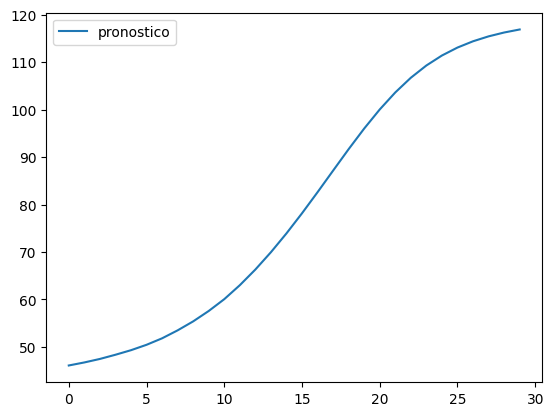

In [121]:
prediccionSig30dias = pd.DataFrame(adimen_inverted)
prediccionSig30dias.columns = ['pronostico']
prediccionSig30dias.plot()